# Caractériser les adhérents de la Médiathèque de Roubaix selon leur lieu d'habitation - partie 2 : Analyse des données

## Transformation du jeu de donnée : on bascule les IRIS en individus
On va modifier le jeu de données pour avoir en ligne les IRIS et en colonnes les différentes variables.
Pour simplifier, on ne conserve que les variables donnant des informations sur les pratiques des adhérents et on laisse de côté (même s'il serait intéressant de les utiliser) les varaibles permettant de les qualifier (âge, sexe, ...).

In [1]:
import pandas as pd

adh = pd.read_csv("data/adh.csv")
iris1 = pd.pivot_table(adh,
                      values=['nb_venues', 'nb_venues_postes_informatiques', 'nb_venues_prets', 'nb_venues_prets_bus', 'nb_venues_prets_mediatheque', 'nb_venues_salle_etude', 'nb_venues_wifi'],
                      index='Code IRIS de Roubaix',
                      aggfunc='mean',
                      fill_value=0)
iris2 = adh['date_extraction'].groupby(adh['Code IRIS de Roubaix']).count()
iris = pd.merge(iris1, iris2, on='Code IRIS de Roubaix')
iris = iris.rename(columns={"date_extraction" : "nb_inscrits"})

On enrichit les données IRIS avec le nb d'habitants, le libellé, le revenu médian (sous dormes absolues et d'indice) :

In [2]:
iris_lib = pd.read_csv("data/iris_data.csv")
iris = pd.merge(iris, iris_lib, on='Code IRIS de Roubaix')
iris

,Code IRIS de Roubaix,nb_venues,nb_venues_postes_informatiques,nb_venues_prets,nb_venues_prets_bus,nb_venues_prets_mediatheque,nb_venues_salle_etude,nb_venues_wifi,nb_inscrits,revenu_fiscal_median_par_uc,pos,indice,Nom de l’IRIS à Roubaix,nb_hab,indice_nb_hab
0,595120101.0,6.755208,3.739583,3.130208,0.161458,2.968750,0.057292,0.458333,192,8472,G3,"0,888050314465409",MACKELLERIE,2267,"0,911241101367719"
1,595120102.0,6.339888,2.176966,4.129213,0.365169,3.764045,0.171348,0.325843,356,10913,G5,"1,14392033542977",FRESNOY,3656,"1,46956218200281"
2,595120201.0,8.912587,6.059441,2.895105,0.048951,2.846154,0.195804,0.517483,286,7222,G2,"0,757023060796646",FOSSE AUX CHENES,2832,"1,13834794842231"
3,595120202.0,7.448276,4.563218,2.465517,0.390805,2.074713,0.293103,0.683908,174,4105,G1,"0,430293501048218",ALMA SUD,2284,"0,918074404730423"
4,595120203.0,6.719745,3.961783,2.331210,0.331210,2.000000,0.515924,0.936306,157,6063,G1,"0,635534591194969",ALMA NORD,1806,"0,725937992532024"
5,595120301.0,8.170306,4.864629,3.179039,1.165939,2.013100,0.174672,0.834061,229,9073,G4,"0,95104821802935",ENTREPONT-CARTIGNY,2782,"1,11824999735553"
6,595120302.0,5.839286,1.380952,4.297619,0.482143,3.815476,0.148810,0.279762,168,10237,G5,"1,0730607966457",HUTIN-ORAN,2528,"1,0161524059363"
7,595120303.0,8.966667,5.309524,3.747619,0.295238,3.452381,0.509524,0.747619,210,7078,G2,"0,741928721174004",CUL DE FOUR,3189,"1,28184731903911"
8,595120401.0,7.900000,4.857895,3.068421,0.447368,2.621053,0.947368,0.278947,190,6545,G1,"0,686058700209644",HOMMELET NORD,2182,"0,877074584554196"
9,595120402.0,12.063197,8.762082,3.249071,0.215613,3.033457,0.479554,1.505576,269,8003,G3,"0,838888888888889",HOMMELET CENTRE,2944,"1,18336735881189"


## Première analyse : répartition des adhérents par IRIS
On peut maintenant regarder comment se répartissent les inscrits à la Médiathèque au sein des différents IRIS.
On calcule la part d'inscrits par rapport au nombre d'habitants de chaque IRIS.

In [4]:
iris['iris_part_inscrits'] = iris['nb_inscrits'] / iris['nb_hab']
iris[['Code IRIS de Roubaix', 'Nom de l’IRIS à Roubaix', 'iris_part_inscrits']].to_csv("data/iris_carte_inscrits.csv", header=True, index=False)

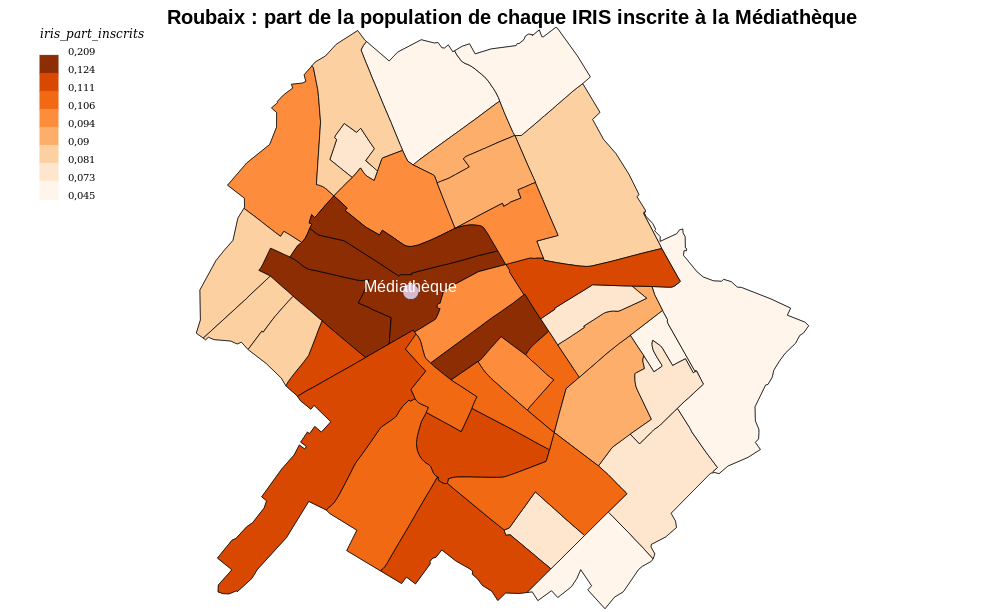

In [5]:
from IPython.display import Image
Image(filename='data/iris_carte_inscrits.png') 

On constate une double tendance, à savoir le taux d'inscription a tendance à diminuer plus :
- on s'éloigne de la Médiathèque,
- les quartiers sont pauvres

On va maintenant se demander comment regrouper les quartiers en fonction des pratiques de leurs habitants. On va donc recourir à une ACP.

## Réalisation d'une ACP pour regrouper les quartiers

In [ ]:
iris.to_csv("data/iris.csv", header=True, index=False)
iris[['Code IRIS de Roubaix', 'Nom de l’IRIS à Roubaix', 'indice']].to_csv("data/iris_carte_revenus.csv", header=True, index=False)

On réalise l'ACP via R. Par facilité, on dépose le code et les résultats dans ce notebook Python.

_____________________________________________________________________
```R
library(FactoMineR)
library(factoextra)
empr <-read.table("data/iris.csv",
                  header=TRUE, sep=',', row.names=13)
summary(empr)
res <-PCA(empr[,c(3,4,5,6,7,8,11)], quali.sup = 7)
barplot(res$eig[,1], main="Eigenvalues", names.arg=1:nrow(res$eig))

fviz_pca_ind(res,
             habillage=empr$pos, repel=TRUE)
```
_____________________________________________________________________

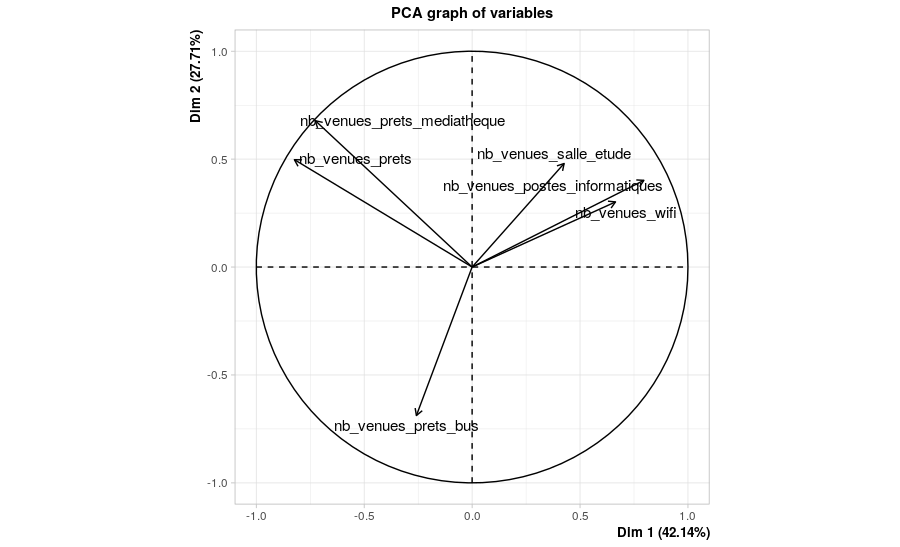

In [7]:
Image(filename='data/pca_variables.png') 

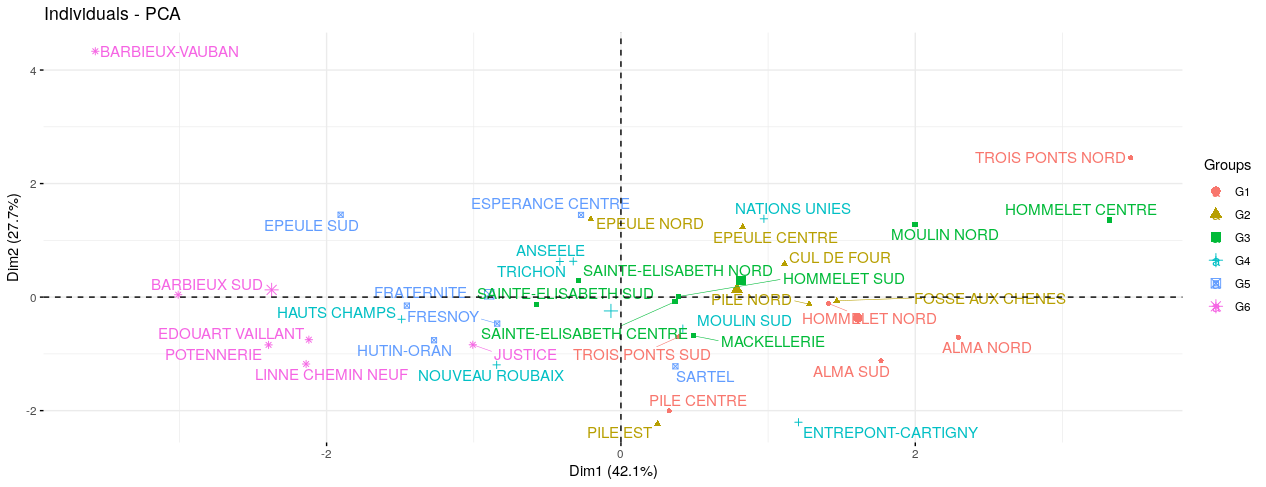

In [8]:
Image(filename='data/pca_individus.png') 